# Credit Card Fraud Detector

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

# classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedShuffleSplit, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
# data ingestion
df = pd.read_csv('creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# checking null values
df.isnull().sum().max()

0

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# we know that the data is imbalanced lets confirm it
Counter(df.Class)

Counter({0: 284315, 1: 492})

Text(0.5, 1.0, 'Distribution of the classes')

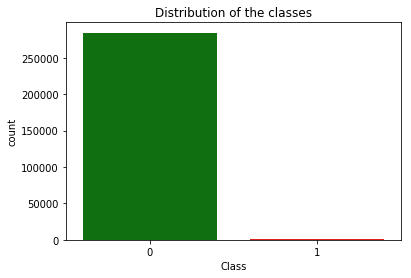

In [7]:
#lets see this in a bar graph
colors=['green', 'red']
sns.countplot('Class', data = df, palette=colors)
plt.title('Distribution of the classes')

Now lets see how time and Amount affects these class

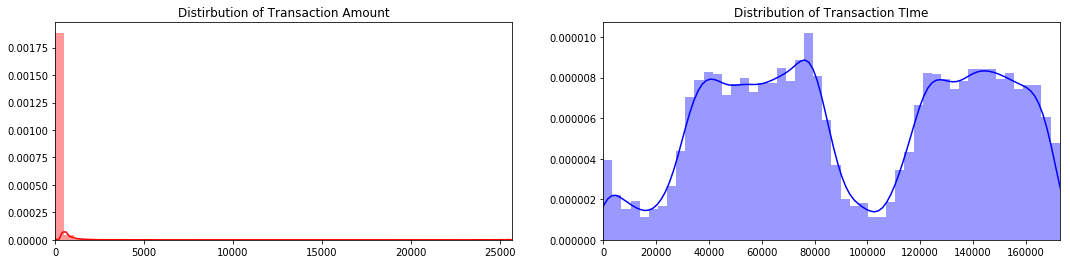

In [8]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(18,4))

amount_val = df.Amount.values
time_val = df.Time.values

#creating a plot for amount
sns.distplot(amount_val, ax = ax1, color='r')
ax1.set_title("Distirbution of Transaction Amount")
ax1.set_xlim([min(amount_val), max(amount_val)])


#creating a plot for time
sns.distplot(time_val, ax = ax2, color='b')
ax2.set_title("Distribution of Transaction TIme")
ax2.set_xlim([min(time_val), max(time_val)])

plt.show()

Well, its really hard to understang anythig from these features at this point. We know that all the features has been the result of transformation and scaling except the above two feautes so lets scale them

In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler

#Robust scaler is less prone to outliers,
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df.Amount.values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df.Time.values.reshape(-1,1))

scaled_amount = df.scaled_amount
scaled_time = df.scaled_time

df.drop(['Time','Amount','scaled_amount','scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


<b>Note:</b> It is very important to split the data for training and testing before resampling the data, because we want to perfom test ultimately on the original datset

In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X,y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
#turning these values into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [11]:
# lets have a look on class distribution of the 
print(collections.Counter(original_ytrain))
print(collections.Counter(original_ytest))

Counter({0: 227452, 1: 394})
Counter({0: 56863, 1: 98})


We can see that our data is highly imbalanced so we are going to perform undersampling in the following steps

In [12]:
#suffling the data at first
df = df.sample(frac=1)

fraud_df = df.loc[df['Class']==1]
non_fraud_df = df.loc[df['Class']==0][:492]

normal_distribution_df = pd.concat([fraud_df, non_fraud_df])

#suffle the data again
new_df = normal_distribution_df.sample(frac=1, random_state = 42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
126602,-0.293440,-0.078173,-1.116422,0.255903,2.091529,-0.670503,-0.965270,-0.454939,-0.656209,0.685009,...,-0.012241,0.159117,0.422855,-0.194823,0.411779,0.153784,-0.494953,0.054040,-0.027747,0
42856,2.110948,-0.510098,-11.682215,6.332882,-13.297109,7.690772,-10.889891,-2.792360,-12.561783,7.287122,...,-1.009320,2.133456,-1.271509,-0.035304,0.615054,0.349024,-0.428923,-0.694935,-0.818970,1
84651,-0.097813,-0.285342,-2.455304,0.685364,-0.193234,-2.548223,-1.711650,-0.077013,-1.685747,1.681035,...,-0.763653,0.039806,0.313180,0.258354,-0.340089,-0.388667,-0.411327,-0.471975,-0.272994,0
17407,1.089779,-0.657902,-29.200329,16.155701,-30.013712,6.476731,-21.225810,-4.902997,-19.791248,19.168327,...,1.715862,1.809371,-2.175815,-1.365104,0.174286,2.103868,-0.209944,1.278681,0.372393,1
157585,-0.293440,0.298347,1.934946,0.650678,-0.286957,3.987828,0.316052,-0.099449,-0.021483,-0.172327,...,-0.344452,-0.173602,-0.190974,0.219976,-0.216597,-0.136692,-0.129954,-0.050077,-0.051082,1


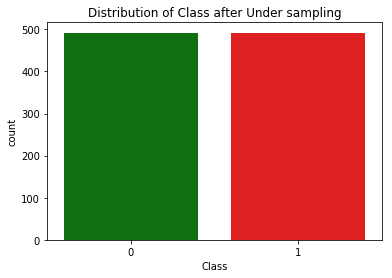

In [13]:
#now after this undersampling step lets see how the distribution looks

sns.countplot('Class', data = new_df, palette=colors)
plt.title("Distribution of Class after Under sampling")
plt.show()

Now thats 50/50 for both the class labels. Now lets see the relation between various features

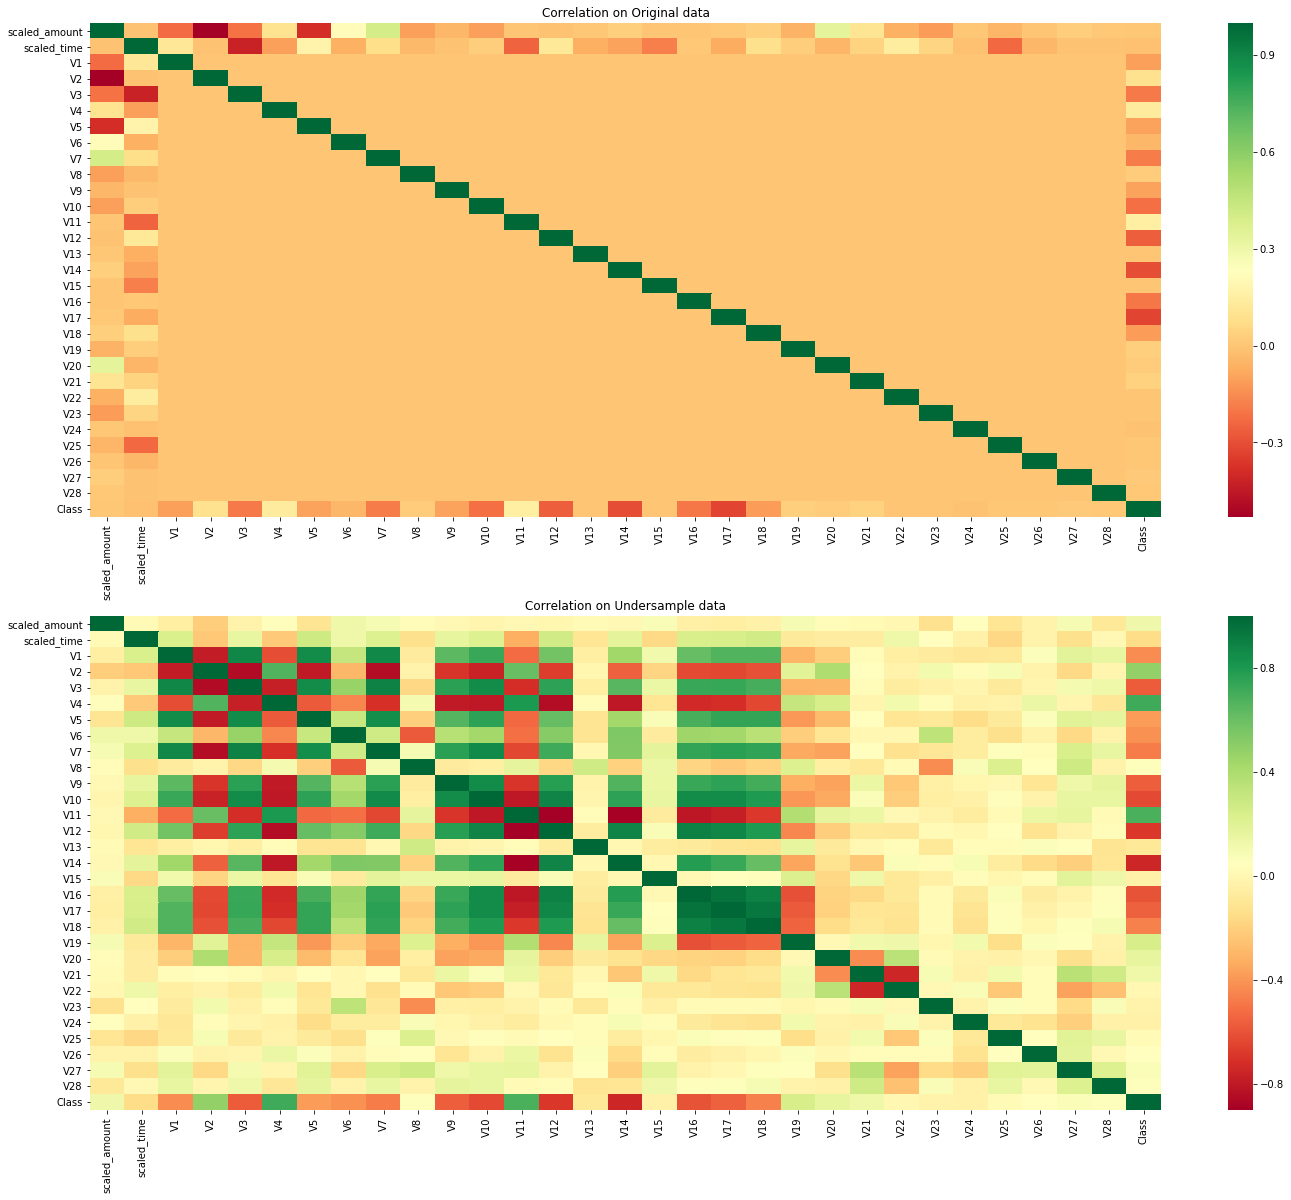

In [14]:
# plotting the correlation among the features give
f, (ax1,ax2) = plt.subplots(2,1, figsize=(24,20))

#entier dataframe
corr = df.corr()
sns.heatmap(corr, cmap='RdYlGn', ax= ax1)
ax1.set_title("Correlation on Original data")

#undersampling
corr_under = new_df.corr()
sns.heatmap(corr_under, cmap='RdYlGn', ax= ax2)
ax2.set_title("Correlation on Undersample data")
plt.show()


<b>Observations:</b> From above heat map we can see that v17, v14, v12 and v10 are negatively correlated. Similarly, v2, v4, v11 and v19 are positiveely correlated. Both negatively and positively correlated values make the outcome more likely to be fruad transaction

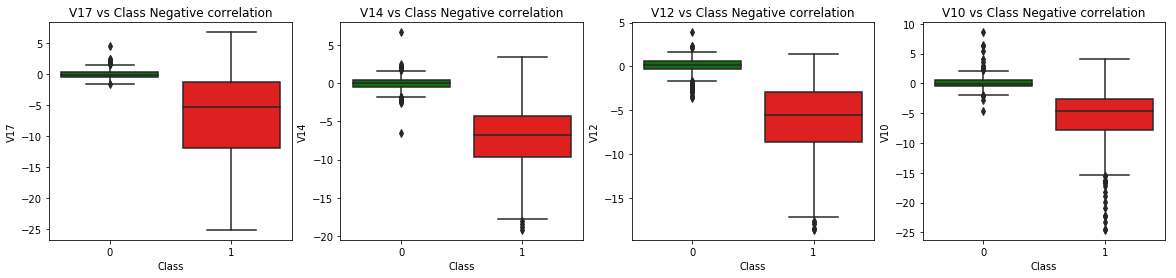

In [15]:
#lets use blox plots to see these features individually
f, ax = plt.subplots(ncols=4, figsize=(20,4))

#Negative correlated
sns.boxplot(x='Class', y = 'V17', data = new_df, ax = ax[0], palette=colors)
ax[0].set_title('V17 vs Class Negative correlation')

sns.boxplot(x='Class', y = 'V14', data = new_df, ax = ax[1], palette=colors)
ax[1].set_title('V14 vs Class Negative correlation')

sns.boxplot(x='Class', y = 'V12', data = new_df, ax = ax[2], palette=colors)
ax[2].set_title('V12 vs Class Negative correlation')

sns.boxplot(x='Class', y = 'V10', data = new_df, ax = ax[3], palette=colors)
ax[3].set_title('V10 vs Class Negative correlation')

plt.show()

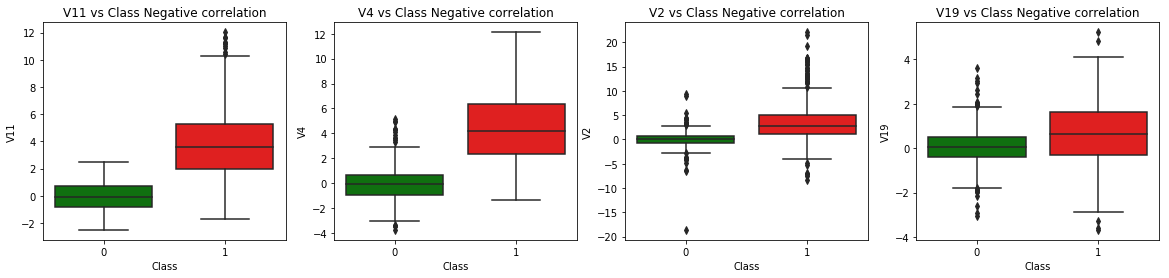

In [16]:
#similarly, lets look at the positive ones
#lets use blox plots to see these features individually
f, ax = plt.subplots(ncols=4, figsize=(20,4))

#Negative correlated
sns.boxplot(x='Class', y = 'V11', data = new_df, ax = ax[0], palette=colors)
ax[0].set_title('V11 vs Class Negative correlation')

sns.boxplot(x='Class', y = 'V4', data = new_df, ax = ax[1], palette=colors)
ax[1].set_title('V4 vs Class Negative correlation')

sns.boxplot(x='Class', y = 'V2', data = new_df, ax = ax[2], palette=colors)
ax[2].set_title('V2 vs Class Negative correlation')

sns.boxplot(x='Class', y = 'V19', data = new_df, ax = ax[3], palette=colors)
ax[3].set_title('V19 vs Class Negative correlation')

plt.show()

Now from the above box plots we can see outliers in both negative and positive correlated features. for now we remove some outliers from negative one. Well, we just remove just the extreme outliers to make sure that we donot loose important information.And How we do this ?? We use Inter Quartile Range Method:

<b>InterQuartile Range (IQR)::</b>
<br> In this method we compute the 75th percentile and 25th percentile and after that we choose some suitable threshold with respect to these percentile and we remove all the points outside this boundary considering them extreme outliers. for now we multuply IQR by 1.5 to set the threshold. Higher is the threshold less outliers will be removed and vice versa. So we should always be careful when choosing it.

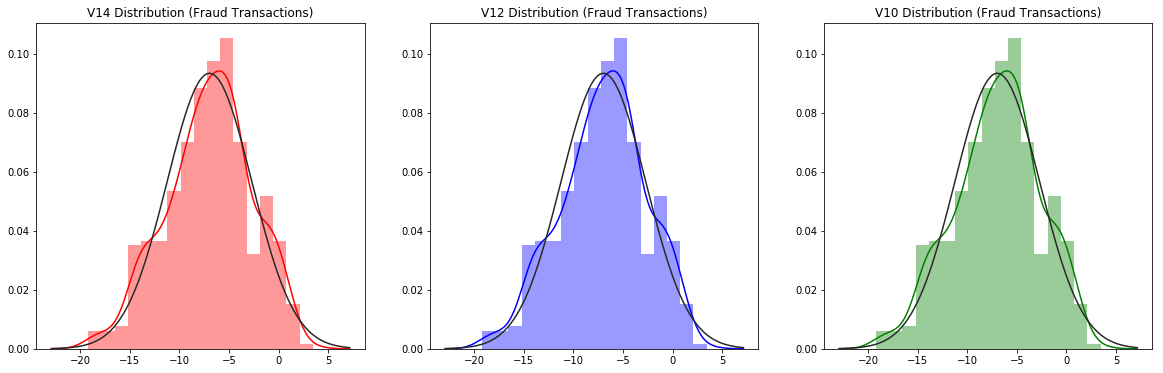

In [17]:
from scipy.stats import norm

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))

v14_fraud_dist = new_df['V14'].loc[new_df.Class == 1].values
sns.distplot(v14_fraud_dist, ax=ax1, fit = norm, color='r')
ax1.set_title('V14 Distribution (Fraud Transactions)')

v12_fraud_dist = new_df['V12'].loc[new_df.Class == 1].values
sns.distplot(v14_fraud_dist, ax=ax2, fit = norm, color='b')
ax2.set_title('V12 Distribution (Fraud Transactions)')

v10_fraud_dist = new_df['V10'].loc[new_df.Class == 1].values
sns.distplot(v14_fraud_dist, ax=ax3, fit = norm, color='g')
ax3.set_title('V10 Distribution (Fraud Transactions)')

plt.show()




In [18]:
len(new_df)

984

In [19]:
# extreme outliers removal steps
v14_fraud = new_df['V14'].loc[new_df.Class == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud,75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75-q25
print('IQR: {}'.format(v14_iqr))
v14_cut_off = v14_iqr *1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75+v14_cut_off
print('Cut off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

#getting the outliers for this feature
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Outliers for v14: {}'.format(len(outliers)))

#dropping those outliers
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('------'*44)

v12_fraud = new_df['V12'].loc[new_df.Class == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud,75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v12_iqr = q75-q25
print('IQR: {}'.format(v12_iqr))
v12_cut_off = v12_iqr *1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75+v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

#getting the outliers for this feature
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('Outliers for v12: {}'.format(len(outliers)))

#dropping those outliers
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('------'*44)

## V10 outliers removal
v10_fraud = new_df['V10'].loc[new_df.Class == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud,75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v10_iqr = q75-q25
print('IQR: {}'.format(v10_iqr))
v10_cut_off = v10_iqr *1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75+v10_cut_off
print('Cut off: {}'.format(v10_cut_off))
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))

#getting the outliers for this feature
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('Outliers for v10: {}'.format(len(outliers)))

#dropping those outliers
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('------'*44)

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
IQR: 5.409902115485519
Cut off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Outliers for v14: 4
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
IQR: 5.780002635714835
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
Outliers for v12: 4
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -7.466658535821848 | Quartile 75: -2.5118611381562523
IQR: 4.954797397665596
Cut off: 7.432196

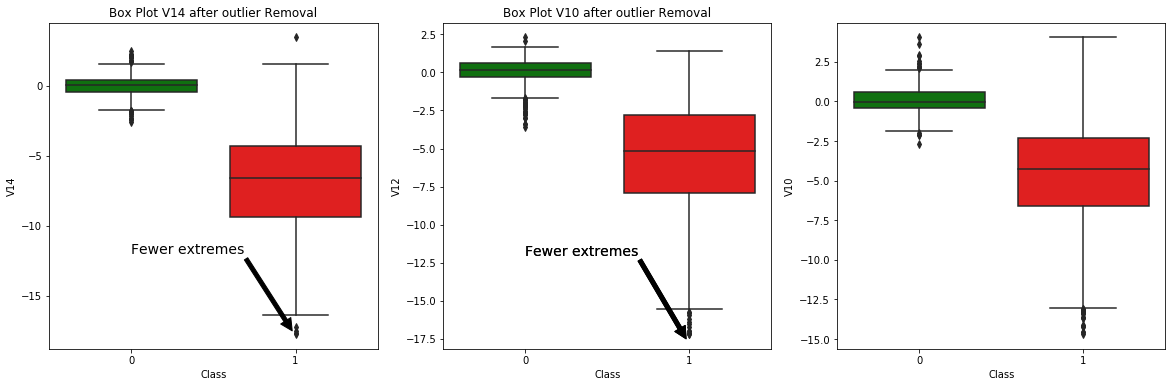

In [20]:
# Now lets plot these values after the removal of extreme outliers
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['green','red']

sns.boxplot(x='Class', y='V14', data=new_df, ax=ax1, palette=colors)
ax1.set_title('Box Plot V14 after outlier Removal')
ax1.annotate('Fewer extremes', xy=(0.98,-17.5), xytext=(0,-12), arrowprops=dict(facecolor='black'), fontsize=14)

sns.boxplot(x='Class', y='V12', data=new_df, ax=ax2, palette=colors)
ax2.set_title('Box Plot V12 after outlier Removal')
ax2.annotate('Fewer extremes', xy=(0.98,-17.5), xytext=(0,-12), arrowprops=dict(facecolor='black'), fontsize=14)

sns.boxplot(x='Class', y='V10', data=new_df, ax=ax3, palette=colors)
ax2.set_title('Box Plot V10 after outlier Removal')
ax2.annotate('Fewer extremes', xy=(0.98,-17.5), xytext=(0,-12), arrowprops=dict(facecolor='black'), fontsize=14)

plt.show()

Now we have removed the extreme outliers, now lets try unsupervised method to separate two classes. We use three methods:
* t-SNE
* PCA
* SVD

### Dimensionality Reduction and Clustering

We can use <b>t-SNE</b> algorithm which bassically reduces the dimensionality of the data without much loss of the information. In simple words, it transform data of higher dimensions to the lower dimension without much loss of the data much like the PCA algorithm

In [21]:
# get X and y out of random samples
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [22]:
#T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1= time.time()
print("Time taken by TSNE: {}".format(t1-t0))

Time taken by TSNE: 9.25027585029602


In [23]:
#PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("Time taken by PCA: {}".format(t1-t0))

Time taken by PCA: 0.024932384490966797


In [24]:
#TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print('Time taken by SVD: {}'.format(t1-t0))

Time taken by SVD: 0.004988193511962891


Now just a summary:
We firstly created 50/50 data by doing undersampling, after that we found features that are mostly correlated with the class and then we removed only the extreme outliers from negatively correlated features and then we employed unsupervised learning algorithm to furm clusters using PCA, TSNE and SVD, now lets see how do they form the cluster and seperate fraud cases from the normal ones

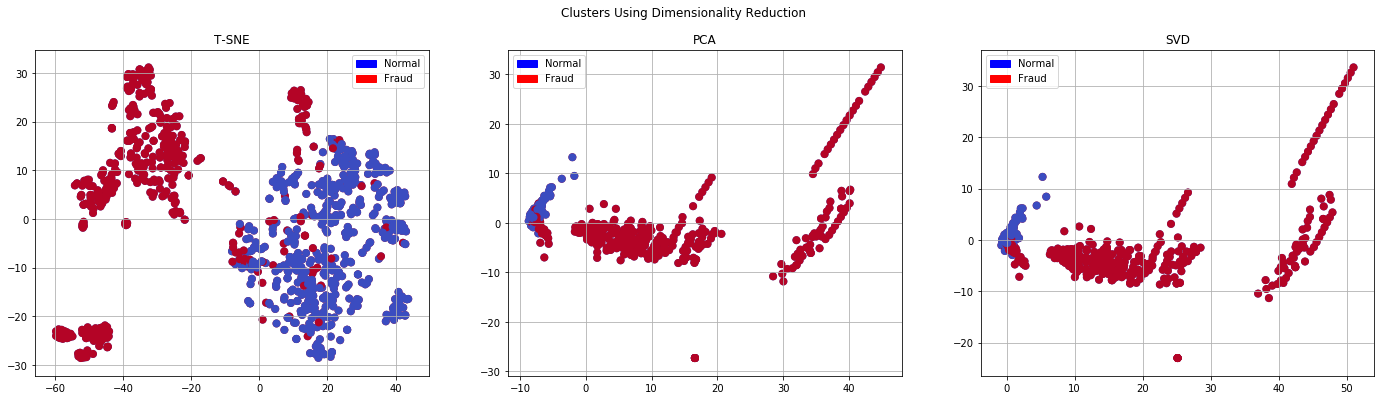

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,6))
f.suptitle('Clusters Using Dimensionality Reduction')

blue_patch = mpatches.Patch(color='blue', label='Normal')
red_patch = mpatches.Patch(color='red', label='Fraud')

#TSNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==0), cmap='coolwarm', label='Normal', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title("T-SNE")
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

#PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y==0), cmap='coolwarm', label='Normal', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title("PCA")
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

#SVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==0), cmap='coolwarm', label='Normal', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title("SVD")
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

So tha was using the clustering technique to see if we can classify fradulent and normal trasactions.
<b>Note:</b> We have are performing on undersampled data 

In [26]:
X.shape

(944, 30)

In [27]:
#Data preparation steps
# Our data is already scaled so we can just split it
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

#turning the values into nupy array 
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#Implementing our classifiers to see how they perform in undersampled data
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
    }

In [28]:
#Lets check our training scores with cross validation
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier: {}, has a training score of {}".format(key, round(training_score.mean()*100,2))+"%")

Classifier: LogisticRegression, has a training score of 94.91%
Classifier: KNearest, has a training score of 94.21%
Classifier: DecisionTreeClassifier, has a training score of 91.8%


So, that was the trainsing score of three machine learning models un undersampled data, Now lets use Hyperparameter Optimization to choose best parameters for these classifier and see if the training score improves. We use GridsearchCV to find the best parameter for Logistic Regression

In [29]:
from sklearn.model_selection import GridSearchCV

#parametrs for logistic Regression
log_reg_params = {'penalty':['l1','l2'], 'C':[0.001,0.01,0.1,1,10,100,1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# getting the best estimators
log_reg = grid_log_reg.best_estimator_

#parameters for KNearest Neighbors
knn_params={'n_neighbors':list(range(2,5)), 'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params)
grid_knn.fit(X_train, y_train)
#best estimator
knn = grid_knn.best_estimator_

#parameters for Support Vector Machine
svc_params = {'C':[0.5,0.7,0.9,1], 'kernel':['linear', 'sigmoid','rbf','poly']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
#best estimator
svc = grid_svc.best_estimator_

#decisiontree classifier
tree_params = {'criterion':['gini','entropy'], 'max_depth':list(range(2,4)), 'min_samples_leaf':list(range(5,7))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree = grid_tree.best_estimator_

Now lets see what king of score we get after using hyperparameter optimization

In [30]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
knn_score = cross_val_score(knn, X_train, y_train, cv = 5)
svc_score = cross_val_score(svc, X_train, y_train, cv =5)
tree_score = cross_val_score(tree, X_train, y_train, cv=5)

print("Logistic Regression CV score: {}".format(round(log_reg_score.mean(),2)*100)+"%")
print("KNN CV score: {}".format(round(knn_score.mean(),2)*100)+"%")
print("SVM CV score: {}".format(round(svc_score.mean(),2)*100)+"%")
print("Decision Tree CV score: {}".format(round(tree_score.mean(),2)*100)+"%")

Logistic Regression CV score: 95.0%
KNN CV score: 95.0%
SVM CV score: 94.0%
Decision Tree CV score: 93.0%


After Performing hyperparameter optimization we got slightly better accuracy then before. 

In [31]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv =5)
knn_pred = cross_val_predict(knn, X_train, y_train, cv =5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5)
tree_pred = cross_val_predict(tree, X_train, y_train, cv=5)

from sklearn.metrics import roc_auc_score
log_roc_auc_score = roc_auc_score(y_train, log_reg_pred)
knn_roc_auc_score = roc_auc_score(y_train, knn_pred)
svc_roc_auc_score = roc_auc_score(y_train, svc_pred)
tree_roc_auc_score = roc_auc_score(y_train, tree_pred)
print("Displaying roc/auc score")
print('Logistic Regression:', log_roc_auc_score)
print('KNears Neighbor:', knn_roc_auc_score)
print('Support Vector Machine:', svc_roc_auc_score)
print('Decision Tree Classifier:', tree_roc_auc_score)

Displaying roc/auc score
Logistic Regression: 0.9480933135928934
KNears Neighbor: 0.9504701692609339
Support Vector Machine: 0.9410867912448481
Decision Tree Classifier: 0.9295746468728743


Now lets plot roc/auc curve

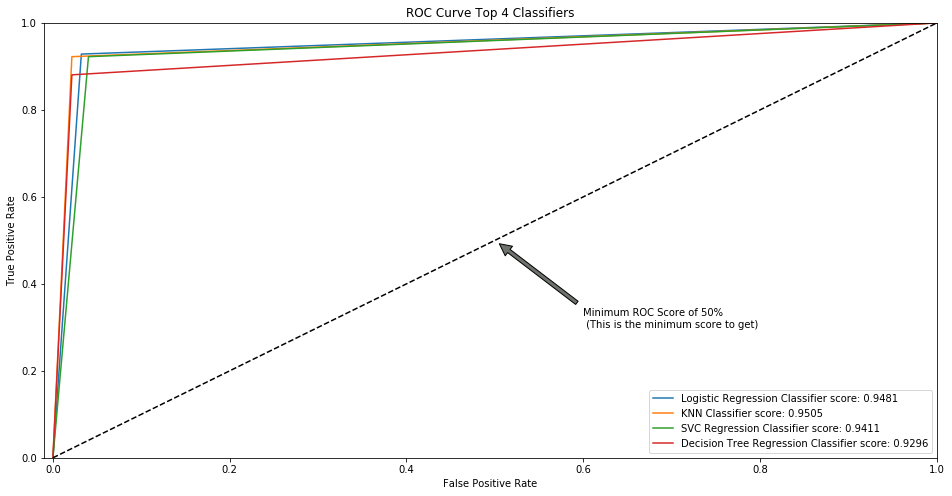

In [32]:
log_fpr, log_tpr, log_threshold = roc_curve(y_train, log_reg_pred)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_train, knn_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

def graph_roc_auc_curve_multiple(log_fpr, log_tpr, knn_fpr, knn_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title("ROC Curve Top 4 Classifiers")
    plt.plot(log_fpr, log_tpr, label="Logistic Regression Classifier score: {:.4f}".format(log_roc_auc_score))
    plt.plot(knn_fpr, knn_tpr, label="KNN Classifier score: {:.4f}".format(knn_roc_auc_score))
    plt.plot(svc_fpr, svc_tpr, label="SVC Regression Classifier score: {:.4f}".format(svc_roc_auc_score))
    plt.plot(tree_fpr, tree_tpr, label="Decision Tree Regression Classifier score: {:.4f}".format(tree_roc_auc_score))
    plt.plot([0,1],[0,1],'k--')
    plt.axis([-0.01,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5,0.5), xytext=(0.6,0.3), arrowprops=dict(facecolor="#6E726D",shrink=0.05))
    plt.legend()

#calling the above function to plot the ROC Curve
graph_roc_auc_curve_multiple(log_fpr, log_tpr, knn_fpr, knn_tpr,svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

### Dealing with imbalanced datasets

Now, lets try a different approach to deal with the imbalanced datasets. Now we use algorithms to deal with these data sets mainly two algorithms:

* NearMiss Algorithm - Undersampling
* SMOTE algorithm - OversSampling

these algorithms perform undersampling or oversampling during the cross validation not before. Similarly, they use some sort of Algorithm to create datasets for example using eculidean distance to generate virtual training records and so on.

<b>Note:</b> We take whole data set, its algorithm that does oversampling or undersampling

In [33]:
undersample_X = df.drop('Class', axis = 1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
#transforming the values to numpy array
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

#creating list to store the metrics values
undersample_accuracy = []
undersample_recall = []
undersample_precision = []
undersample_f1=[]
undersample_auc = []

#the block of code below is just to show how they perform sampling
#implemnetion of nearmiss technique
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('Nearmiss Label Distribution: {}'.format(Counter(y_nearmiss)))

X_smoote, y_smoote = SMOTE().fit_sample(undersample_X.values, undersample_y.values)
print('Smoote Label Distribution: {}'.format(Counter(y_smoote)))

Nearmiss Label Distribution: Counter({0: 492, 1: 492})
Smoote Label Distribution: Counter({0: 284315, 1: 284315})


so as shown above Nearmiss algorithm and SMOTE do resampling by themselves

In [34]:
#performing cross validation the right way with sampling
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)#smote hapens diring cv not before
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train],undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
        
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

In [35]:
#now lets see the accuracy during traing
print("Evaluting training performance of sampling during cross validation step")
print("Accuracy :{}".format(round(np.mean(undersample_accuracy),3)*100)+"%")
print("Recall :{}".format(round(np.mean(undersample_recall),3)*100)+"%")
print("Precision :{}".format(round(np.mean(undersample_precision),3)*100)+"%")
print("F1 :{}".format(round(np.mean(undersample_f1),3)*100)+"%")
print("AUC :{}".format(round(np.mean(undersample_auc),3)*100)+"%")

Evaluting training performance of sampling during cross validation step
Accuracy :57.3%
Recall :41.199999999999996%
Precision :0.2%
F1 :0.3%
AUC :49.3%


### A Deeper Look into logistic Regression

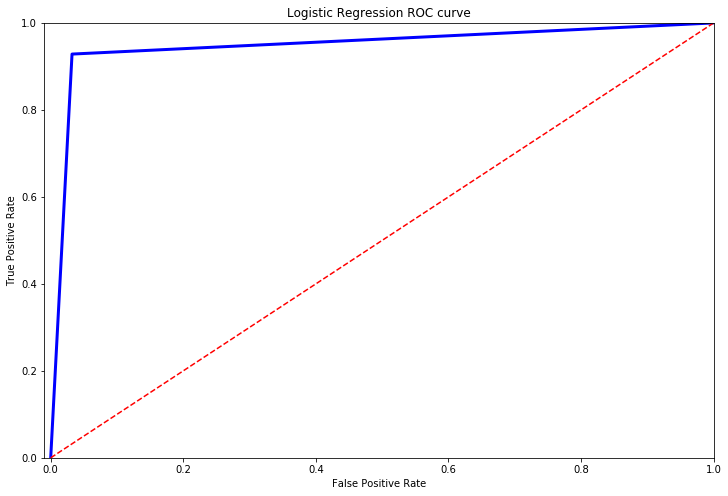

In [36]:
def logistic_roc_auc_curve(log_fpr, log_tpr):
    plt.figure(figsize = (12,8))
    plt.title("Logistic Regression ROC curve")
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=3)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.axis([-0.01,1,0,1])
    
logistic_roc_auc_curve(log_fpr, log_tpr)
plt.show()

In [37]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [38]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score
y_pred = log_reg.predict(X_train)

#overfitting case
print('-'*25)
print('Overfitting case: \n')
#y_pred is the prediction of previously sampled data, where as below we have accuracy of model when sampling during cv
print("Accuracy score: {:.2f}".format(accuracy_score(y_train,y_pred)))
print("Recall score: {:.2f}".format(recall_score(y_train,y_pred)))
print("Precision score: {:.2f}".format(precision_score(y_train,y_pred)))
print("F1 score: {:.2f}".format(f1_score(y_train,y_pred)))
print('-'*25)

#How it should actually be
print('-'*25)
print('How it should be')
print('Accuracy Score: {:.2f}'.format(np.mean(undersample_accuracy)))
print('Precision Score: {:.2f}'.format(np.mean(undersample_precision)))
print('Recall Score: {:.2f}'.format(np.mean(undersample_recall)))
print('F1 Score: {:.2f}'.format(np.mean(undersample_f1)))
print('-'*25)

-------------------------
Overfitting case: 

Accuracy score: 0.75
Recall score: 0.94
Precision score: 0.67
F1 score: 0.78
-------------------------
-------------------------
How it should be
Accuracy Score: 0.57
Precision Score: 0.00
Recall Score: 0.41
F1 Score: 0.00
-------------------------


In [39]:
undersample_y_score = log_reg.decision_function(original_Xtest)
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)
print('Average precision - recall score: {0:0.2f}'.format(undersample_average_precision))

Average precision - recall score: 0.02


now lets plot the precision recall curve

Text(0.5, 1.0, 'Undersampling Precison_Recall Curve')

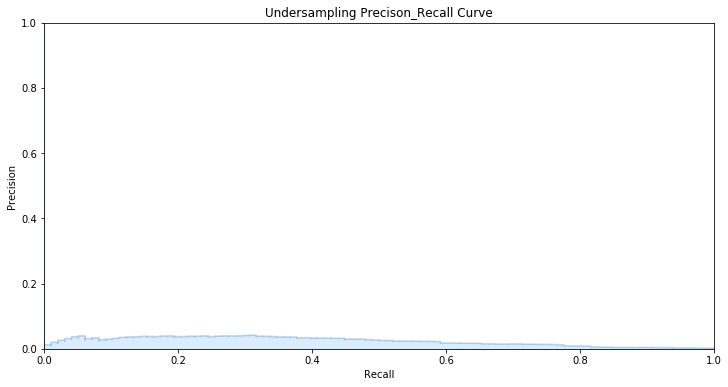

In [40]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, thershold = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color="#004a93", alpha = 0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("Undersampling Precison_Recall Curve")

### Oversampling with SMOTE


In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

#list to append the score and then find the average
accuracy_list = []
precision_lst=[]
recall_lst=[]
f1_lst=[]
auc_lst = []

# #Classifier with optimal parameters
# log_reg_sm = LogisticRegression()

# rand_log_reg = RandomizedSearchCV(log_reg_sm, log_reg_params, n_iter=4)

# #Implementing SMOTE Technique
# #Cross Validating the right way
# #Parameters
# log_reg_params = {'penalty':['l1','l2'], 'C':[0.001,0.01,0.1,1,10,100,1000]}
# for train, test in sss.split(original_Xtrain, original_ytrain):
#     pipeline =imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)# SMOTE happens during the cross validation not before
#     model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
#     best_est = rand_log_reg.best_estimator_
#     prediction = best_est.predict(original_Xtrain[test])
    
#     accuracy_list.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
#     recall_lst.append(recall_score(original_ytrain[test], prediction))
#     precision_lst.append(precision_score(original_ytrain[test], prediction))
#     f1_lst.append(f1_score(original_ytrain[test], prediction))
#     auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
#     print('----'*45)
#     print(' ')
#     print('Accuracy: {}'.format(np.mean(accuracy_list)))
#     print('Recall: {}'.format(np.mean(recall_lst)))
#     print('Precision: {}'.format(np.mean(precision_lst)))
#     print('F1: {}'.format(np.mean(f1_lst)))
#     print('----'*45)


Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
